In [479]:
# Loading the basic Python libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

#### Pasting screenshots of the file

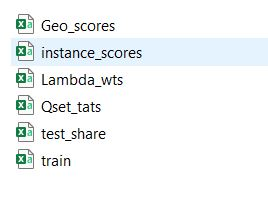

In [480]:
# Creating dictionary of Pandas dfs

combined_data = {"geo" : 0,
                 "instance" : 0,
                 "lambdawts" : 0,
                 "qset" : 0,
                 "test_data" : 0,
                 "train_data" : 0}

In [481]:
# Creating a function to load the files into Pandas df

import pandas as pd

def load_csv(file_path):
    '''This function reads and return a .csv file'''
    return pd.read_csv(file_path)

# Saving the function as data_loader.py file

In [482]:
# Creating dfs using function
# Loading data

for data_frame in combined_data.keys():
    combined_data[data_frame] = load_csv(rf"..\data\raw\{data_frame}.csv")

In [483]:
# Creating a function to get value out of df/series using functions/methods/sttributes

def apply_df_method(df, method_name, *args, **kwargs):
    """
    Apply a method of a DataFrame dynamically.

    Parameters:
        df (pd.DataFrame): The DataFrame to operate on.
        method_name (str): The name of the DataFrame method (e.g., "mean", "shape").
        *args: Positional arguments to pass to the method.
        **kwargs: Keyword arguments to pass to the method.

    Returns:
        Result of the method call.
    """
    # Get the method
    if hasattr(df, method_name):
        method = getattr(df, method_name)
        # If it's callable (like df.mean()), call it
        if callable(method):
            return method(*args, **kwargs)
        else:
            return method  # For properties like df.shape or df.columns
    else:
        raise AttributeError(f"'{type(df).__name__}' object has no method or attribute '{method_name}'")

# Saving the function as informer.py

In [484]:
# Checking the shape of the data

for key in combined_data.keys():
    print(f"The shape of {key} file : ", apply_df_method(combined_data[key], 'shape'))
    print()
    
# Outcome :
# lamdbawts, test_data and train_data have different number of rows

The shape of geo file :  (1424035, 2)

The shape of instance file :  (1424035, 2)

The shape of lambdawts file :  (1400, 2)

The shape of qset file :  (1424035, 2)

The shape of test_data file :  (56962, 27)

The shape of train_data file :  (227845, 28)



In [485]:
# Checking the columns of the data sets

for key in combined_data.keys():
    print(f"The columns of {key} file: ", apply_df_method(combined_data[key], 'columns').tolist())
    print()

# Outcome :
# Only 'id' column-> geo, instance and qset
# Only 'Group' column-> lambdawts
# Both 'id' and 'Group' columns-> test_data and train_data

The columns of geo file:  ['id', 'geo_score']

The columns of instance file:  ['id', 'instance_scores']

The columns of lambdawts file:  ['Group', 'lambda_wt']

The columns of qset file:  ['id', 'qsets_normalized_tat']

The columns of test_data file:  ['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7', 'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7', 'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6', 'Normalised_FNT']

The columns of train_data file:  ['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7', 'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7', 'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6', 'Normalised_FNT', 'Target']



In [486]:
# Checking the number of unique values in a particular column(id/group)

for key in combined_data.keys():
    if 'id' in combined_data[key].columns:
        print(f"Number of unique values in 'id' column of {key} file: ", apply_df_method(combined_data[key]['id'], 'nunique'))
        print()
    if 'Group' in combined_data[key].columns:
        print(f"Number of unique values in 'Group' column of {key} file: ", apply_df_method(combined_data[key]['Group'], 'nunique'))
        print()

# Outcome:
#  test_data and train_data has fewer number of unique 'ids' than rest of the data files 
# Moreover, they have fewer number of unique 'Groups' than lambdawts file

#Action to take:
# To combine test_data and train_data to check if they get align

Number of unique values in 'id' column of geo file:  284807

Number of unique values in 'id' column of instance file:  284807

Number of unique values in 'Group' column of lambdawts file:  1400

Number of unique values in 'id' column of qset file:  284807

Number of unique values in 'id' column of test_data file:  56962

Number of unique values in 'Group' column of test_data file:  915

Number of unique values in 'id' column of train_data file:  227845

Number of unique values in 'Group' column of train_data file:  1301



In [487]:
# Adding a mark of train and test to both of their respective files before merging data

combined_data["train_data"]['data'] = 'train'
combined_data["test_data"]['data'] = 'test'

In [488]:
# Checking columns of train_data after marking
combined_data["train_data"].columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data'],
      dtype='object')

In [489]:
# Chacking columns of test_data after marking

combined_data["test_data"].columns

#Outcome:
# train_data has 1 extra column named as 'Target' than test_data
#Which is fine as that is our dependent variable

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'data'],
      dtype='object')

In [490]:
# Checking the last 5 values of newly added column(data) in train_data

combined_data["train_data"].tail()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
227840,97346,Grp232,0.476667,1.013333,0.536667,0.576667,1.406667,1.846667,0.600000,1.103333,...,0.630000,0.633333,0.996667,0.646667,0.533333,0.680000,0.693333,-246.5025,0,train
227841,147361,Grp199,1.363333,0.730000,0.060000,0.776667,0.883333,0.466667,0.733333,0.590000,...,0.356667,0.766667,0.730000,0.596667,0.730000,0.646667,0.656667,-249.7775,0,train
227842,50989,Grp36,1.060000,0.756667,0.906667,0.896667,0.503333,0.396667,0.683333,0.620000,...,0.510000,0.740000,0.873333,0.700000,0.696667,0.663333,0.673333,-249.7775,0,train
227843,149780,Grp445,0.433333,1.013333,1.163333,0.940000,0.930000,0.900000,0.813333,0.720000,...,0.606667,0.540000,0.643333,0.906667,0.540000,0.766667,0.710000,-242.7500,0,train
227844,22175,Grp143,1.006667,0.553333,0.946667,1.206667,0.406667,0.750000,0.520000,0.756667,...,0.646667,0.636667,0.683333,0.843333,0.580000,0.683333,0.676667,-235.0000,0,train


In [491]:
# Checking the last 5 values of newly added column(data) in test_data

combined_data["test_data"].tail()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,data
56957,18333,Grp102,0.553333,1.043333,1.096667,0.686667,0.673333,0.340000,0.900000,0.643333,...,0.576667,0.433333,0.660000,0.776667,0.610000,0.690000,0.750000,0.700000,-249.5050,test
56958,244207,Grp504,1.353333,0.616667,0.276667,0.783333,0.690000,0.650000,0.473333,0.670000,...,0.713333,0.870000,0.683333,0.690000,0.640000,0.883333,0.663333,0.660000,-248.7525,test
56959,103277,Grp78,1.083333,0.433333,0.806667,0.490000,0.243333,0.316667,0.533333,0.606667,...,0.433333,0.063333,0.753333,0.780000,0.603333,0.880000,0.643333,0.676667,-231.0500,test
56960,273294,Grp134,0.566667,1.153333,0.370000,0.616667,0.793333,0.226667,0.910000,0.696667,...,0.776667,1.026667,0.626667,0.646667,0.566667,0.616667,0.713333,0.706667,-246.3150,test
56961,223337,Grp18,1.426667,0.110000,-0.006667,-0.200000,0.983333,1.870000,0.033333,0.963333,...,0.616667,0.670000,0.770000,0.893333,0.586667,0.616667,0.683333,0.650000,-248.4500,test


In [492]:
# Merging all the data row wise

all_data = pd.concat([combined_data["train_data"], combined_data["test_data"]], axis=0) 

In [493]:
# Checking top 5 rows after merging

all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train


In [494]:
# Checking last 5 rows after merging

all_data.tail()

# Outcome:
# Merging seems good as checked by values in 'data' column
# 'Target' column has null values which is expected as there was no 'Target' column in test_data

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
56957,18333,Grp102,0.553333,1.043333,1.096667,0.686667,0.673333,0.340000,0.900000,0.643333,...,0.433333,0.660000,0.776667,0.610000,0.690000,0.750000,0.700000,-249.5050,NaN,test
56958,244207,Grp504,1.353333,0.616667,0.276667,0.783333,0.690000,0.650000,0.473333,0.670000,...,0.870000,0.683333,0.690000,0.640000,0.883333,0.663333,0.660000,-248.7525,NaN,test
56959,103277,Grp78,1.083333,0.433333,0.806667,0.490000,0.243333,0.316667,0.533333,0.606667,...,0.063333,0.753333,0.780000,0.603333,0.880000,0.643333,0.676667,-231.0500,NaN,test
56960,273294,Grp134,0.566667,1.153333,0.370000,0.616667,0.793333,0.226667,0.910000,0.696667,...,1.026667,0.626667,0.646667,0.566667,0.616667,0.713333,0.706667,-246.3150,NaN,test
56961,223337,Grp18,1.426667,0.110000,-0.006667,-0.200000,0.983333,1.870000,0.033333,0.963333,...,0.670000,0.770000,0.893333,0.586667,0.616667,0.683333,0.650000,-248.4500,NaN,test


In [495]:
# Checking columns after merging

all_data.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data'],
      dtype='object')

In [496]:
# Checking unique values of 'id' and 'Group' columns in merged data

print(f"Number of unique values in 'id' column of all_data file: ", apply_df_method(all_data['id'], 'nunique'))
print()
print(f"Number of unique values in 'Group' column of all_data file: ", apply_df_method(all_data['Group'], 'nunique'))

# Outcome :
# Merged data seems consistent with other data files

Number of unique values in 'id' column of all_data file:  284807

Number of unique values in 'Group' column of all_data file:  1400


In [497]:
# Adding all_data to the dictionary

combined_data['all_data'] = all_data

In [498]:
# Checking the dictionary

combined_data['all_data'].tail()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
56957,18333,Grp102,0.553333,1.043333,1.096667,0.686667,0.673333,0.340000,0.900000,0.643333,...,0.433333,0.660000,0.776667,0.610000,0.690000,0.750000,0.700000,-249.5050,NaN,test
56958,244207,Grp504,1.353333,0.616667,0.276667,0.783333,0.690000,0.650000,0.473333,0.670000,...,0.870000,0.683333,0.690000,0.640000,0.883333,0.663333,0.660000,-248.7525,NaN,test
56959,103277,Grp78,1.083333,0.433333,0.806667,0.490000,0.243333,0.316667,0.533333,0.606667,...,0.063333,0.753333,0.780000,0.603333,0.880000,0.643333,0.676667,-231.0500,NaN,test
56960,273294,Grp134,0.566667,1.153333,0.370000,0.616667,0.793333,0.226667,0.910000,0.696667,...,1.026667,0.626667,0.646667,0.566667,0.616667,0.713333,0.706667,-246.3150,NaN,test
56961,223337,Grp18,1.426667,0.110000,-0.006667,-0.200000,0.983333,1.870000,0.033333,0.963333,...,0.670000,0.770000,0.893333,0.586667,0.616667,0.683333,0.650000,-248.4500,NaN,test


In [503]:
#Checking the null values

for key in combined_data.keys():
    print(f"The null values in {key} file: ")
    print(apply_df_method(combined_data[key], 'isnull').sum())
    print("----------------------------------")

# Outcome:
# geo file and qset file has null values
# all_data has null values in targer column which is understood as we got this column while merging both train and test datasets

The null values in geo file: 
id               0
geo_score    71543
dtype: int64
----------------------------------
The null values in instance file: 
id                 0
instance_scores    0
dtype: int64
----------------------------------
The null values in lambdawts file: 
Group        0
lambda_wt    0
dtype: int64
----------------------------------
The null values in qset file: 
id                           0
qsets_normalized_tat    103201
dtype: int64
----------------------------------
The null values in test_data file: 
id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0
Per9              0
Dem1              0
Dem2              0
Dem3              0
Dem4              0
Dem5              0
Dem6              0
Dem7              0
Dem8              0
Dem9              0
Cred1             0
Cred2             0
Cred3             0
Cred4   

In [504]:
# Describing the data

print(combined_data["geo"].describe())
print("----------------------------------")
print(combined_data["qset"].describe())

# Outcome:
# We can either fill with median value or mean value

                 id     geo_score
count  1.424035e+06  1.352492e+06
mean   1.424030e+05 -9.279168e-06
std    8.221673e+04  7.827199e+00
min    0.000000e+00 -1.093900e+02
25%    7.120100e+04 -5.860000e+00
50%    1.424030e+05  1.800000e-01
75%    2.136050e+05  5.860000e+00
max    2.848060e+05  4.581000e+01
----------------------------------
                 id  qsets_normalized_tat
count  1.424035e+06          1.320834e+06
mean   1.424030e+05          1.094006e-05
std    8.221673e+04          7.731794e+00
min    0.000000e+00         -1.404400e+02
25%    7.120100e+04         -5.860000e+00
50%    1.424030e+05          2.000000e-02
75%    2.136050e+05          5.860000e+00
max    2.848060e+05          6.110000e+01


In [505]:
# Imputing median values in both the columns

combined_data["geo"]["geo_score"] = combined_data["geo"]["geo_score"].fillna(combined_data["geo"]["geo_score"].median())
combined_data["qset"]["qsets_normalized_tat"] = combined_data["qset"]["qsets_normalized_tat"].fillna(combined_data["qset"]["qsets_normalized_tat"].median())

In [506]:
#Checking the null values again

for key in combined_data.keys():
    print(f"The null values in {key} file: ")
    print(apply_df_method(combined_data[key], 'isnull').sum())
    print("----------------------------------")

# Outcome:
# Null values succesfully handled

The null values in geo file: 
id           0
geo_score    0
dtype: int64
----------------------------------
The null values in instance file: 
id                 0
instance_scores    0
dtype: int64
----------------------------------
The null values in lambdawts file: 
Group        0
lambda_wt    0
dtype: int64
----------------------------------
The null values in qset file: 
id                      0
qsets_normalized_tat    0
dtype: int64
----------------------------------
The null values in test_data file: 
id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0
Per9              0
Dem1              0
Dem2              0
Dem3              0
Dem4              0
Dem5              0
Dem6              0
Dem7              0
Dem8              0
Dem9              0
Cred1             0
Cred2             0
Cred3             0
Cred4             0
Cred5 

In [507]:
# Checking shape of the Geo file

combined_data["geo"].shape

(1424035, 2)

In [508]:
#Checking number of unique values in Geo file

combined_data["geo"]["id"].nunique()

# Outcome:
# Unique values are way less than all the values which is expected
# This means that same 'id' is repeating many times

# Action:
# Lets just take the mean of the geo scores grouped by the 'id'.
# This will give an average geo score per id which means we'll get a sense of the location.

284807

In [509]:
# Taking average of geo scores grouped by 'id'

combined_data["geo"] = combined_data["geo"].groupby('id').mean()

In [510]:
combined_data["geo"].shape

(284807, 1)

In [511]:
combined_data["geo"]

,geo_score
id,
0,-0.620
1,1.106
2,0.070
3,0.180
4,0.540
...,...
284802,2.710
284803,0.956
284804,0.060


In [512]:
# Same thing we are doing with the qset file

combined_data["qset"] = combined_data["qset"].groupby('id').mean()

In [513]:
combined_data["qset"].shape

(284807, 1)

In [514]:
# Same thing we are doing with the instance file.

combined_data["instance"].shape

(1424035, 2)

In [515]:
combined_data["instance"] = combined_data["instance"].groupby('id').mean()

In [516]:
combined_data["instance"].shape

(284807, 1)

In [517]:
# Checking the shape of the lambdawts file

combined_data["lambdawts"].shape

(1400, 2)

In [518]:
# Checking the shape of the data

for key in combined_data.keys():
    print(f"The shape of {key} file : ", apply_df_method(combined_data[key], 'shape'))
    print()
    
# Outcome :
# We can merge all the data

The shape of geo file :  (284807, 1)

The shape of instance file :  (284807, 1)

The shape of lambdawts file :  (1400, 2)

The shape of qset file :  (284807, 1)

The shape of test_data file :  (56962, 28)

The shape of train_data file :  (227845, 29)

The shape of all_data file :  (284807, 29)



In [ ]:
# Merging the data frames one by one apart from lambdawts df

all_data = pd.merge(all_data, combined_data["geo"], on='id', how = 'left')
all_data = pd.merge(all_data, combined_data["instance"] , on='id', how = 'left')
all_data = pd.merge(all_data, combined_data["qset"] , on='id', how = 'left')

# Learning: 
# pd.merge() automatically merges columns with index prvided both have same names

In [520]:
# Merging lambdawts

all_data = pd.merge(all_data, combined_data["lambdawts"], on='Group', how = 'left')


In [521]:
# Checking the data

all_data.head(2)


,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.34,1.010000,...,0.603333,0.686667,0.673333,-245.75,0.0,train,0.256,-0.06,-0.70,-0.13
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.81,0.783333,...,0.670000,0.553333,0.653333,-248.00,0.0,train,-0.250,0.52,0.14,0.66


In [522]:
# Splitting the data to train and test

train_data = all_data[all_data["data"]=='train']
test_data = all_data[all_data["data"]=='test']

In [523]:
# Checking the shape of train data

train_data.shape

(227845, 33)

In [524]:
# Checking the shape of the test data 

test_data.shape

# Outcome:
# Both train_data and test_data now have original shape

(56962, 33)

In [525]:
# Checking the columns of train_data

train_data.columns

# Outcome:
# column 'data' is no longer required.
# column 'id' and 'Group' does not seem significant 
# column 'Traget' is our dependent variable

# Action to take:
# Split the data between dependent and independent variables 
# Drop columns that are not required.

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data', 'geo_score', 'instance_scores',
       'qsets_normalized_tat', 'lambda_wt'],
      dtype='object')

In [526]:
# Splitting the data into independent and dependent variable and dropping the columns 

X = train_data.drop(['id', 'Group', 'Target', 'data'], axis=1)
y = train_data['Target']


In [527]:
# Saving the training data in the system 

X.to_csv(r"..\data\processed\X_train.csv")
y.to_csv(r"..\data\processed\y_train.csv")

In [528]:
# Checking the Independent variable of train_data

X.head(2)

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.34,1.010000,0.863333,0.46,...,1.01,0.933333,0.603333,0.686667,0.673333,-245.75,0.256,-0.06,-0.70,-0.13
1,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.81,0.783333,0.190000,0.47,...,0.69,0.560000,0.670000,0.553333,0.653333,-248.00,-0.250,0.52,0.14,0.66


In [529]:
# Checking the columns of independent variables of train_data

X.columns

Index(['Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7', 'Per8', 'Per9',
       'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7', 'Dem8', 'Dem9',
       'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6', 'Normalised_FNT',
       'geo_score', 'instance_scores', 'qsets_normalized_tat', 'lambda_wt'],
      dtype='object')

In [530]:
# Checking the dependent variables of train_data

y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Target, dtype: float64

In [531]:
# Checking the columns of the test_data

test_data.columns

# Outcome:
# 'Target' column is not required as it does not contain any value 
# 'data' column is not required anymore
# 'id' and 'Group' columns are un-neccesary

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data', 'geo_score', 'instance_scores',
       'qsets_normalized_tat', 'lambda_wt'],
      dtype='object')

In [532]:
# Removing all the unnecessary columns from test_data

test_data = test_data.drop(['id', 'Group', 'Target', 'data'], axis = 1)


In [533]:
# Checking the df
# This data is for prediction.

test_data.head(2)

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
227845,-0.300000,1.540000,0.22,-0.280000,0.57,0.260000,0.70,1.076667,0.930000,0.156667,...,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,0.25,-0.04,-0.426,0.76
227846,0.633333,0.953333,0.81,0.466667,0.91,0.253333,1.04,0.550000,0.543333,0.433333,...,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,0.43,-0.77,-0.620,0.18


In [534]:
# Saving the testing data in the system 

test_data.to_csv(r"..\data\processed\test_data.csv")

# ****Actual Data****

In [535]:
X.head()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,0.863333,0.460000,...,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.256,-0.06,-0.700,-0.13
1,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,0.190000,0.470000,...,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,-0.250,0.52,0.140,0.66
2,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,0.226667,0.660000,...,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,-0.950,1.56,-0.430,-0.51
3,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,0.486667,1.096667,...,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.490,0.70,-0.302,0.72
4,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,0.516667,0.756667,...,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.850,-0.47,-0.630,0.60


In [536]:
# Checking the null values

X.isnull().any()

# Outcome:
# No null values 

Per1                    False
Per2                    False
Per3                    False
Per4                    False
Per5                    False
Per6                    False
Per7                    False
Per8                    False
Per9                    False
Dem1                    False
Dem2                    False
Dem3                    False
Dem4                    False
Dem5                    False
Dem6                    False
Dem7                    False
Dem8                    False
Dem9                    False
Cred1                   False
Cred2                   False
Cred3                   False
Cred4                   False
Cred5                   False
Cred6                   False
Normalised_FNT          False
geo_score               False
instance_scores         False
qsets_normalized_tat    False
lambda_wt               False
dtype: bool

In [537]:
# Creating a function to save images created in this notebook.

from pathlib import Path

IMAGES_PATH = Path().cwd()/"images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(df, fig_id, tight_layout=True, fig_extension="png", resolution=300):
    
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    sns.boxplot(df[fig_id])
    plt.savefig(path, format=fig_extension, dpi=resolution)
    plt.show()


# Saving the function as save_images.py

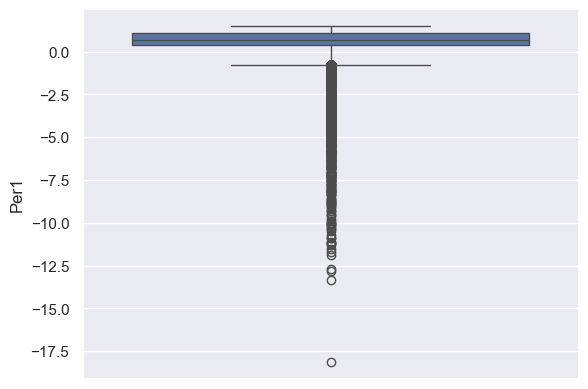

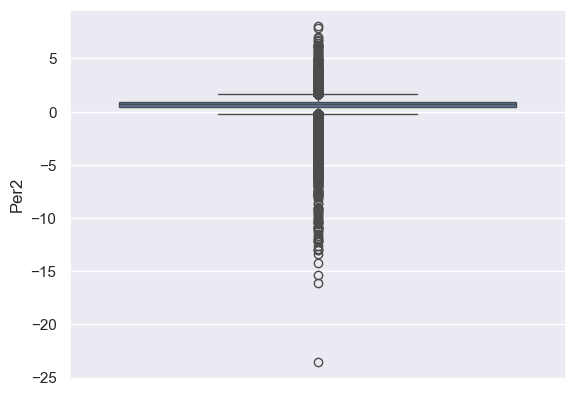

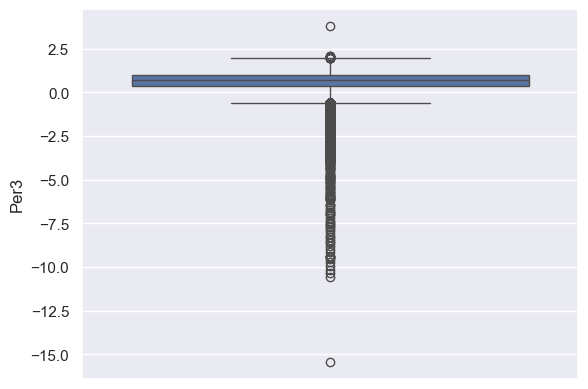

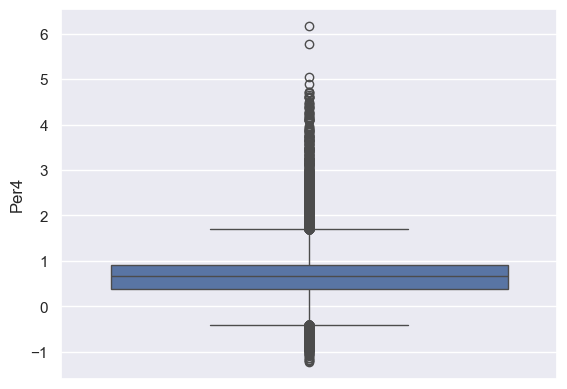

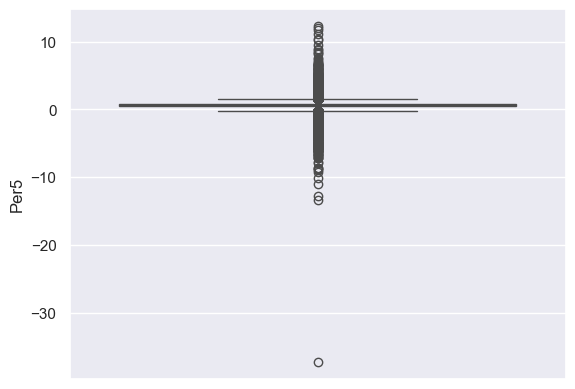

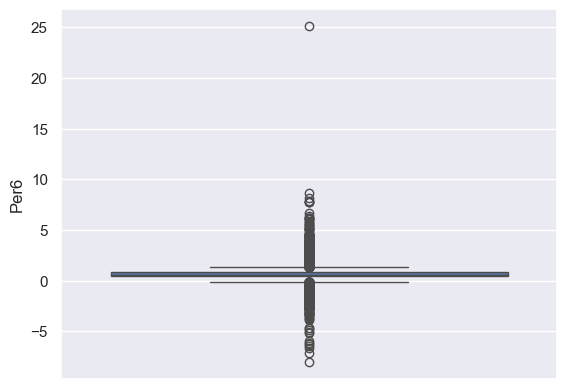

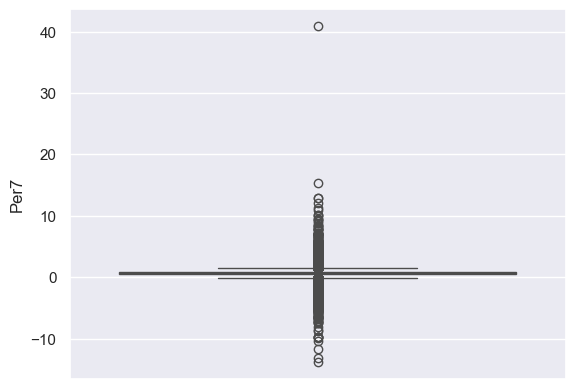

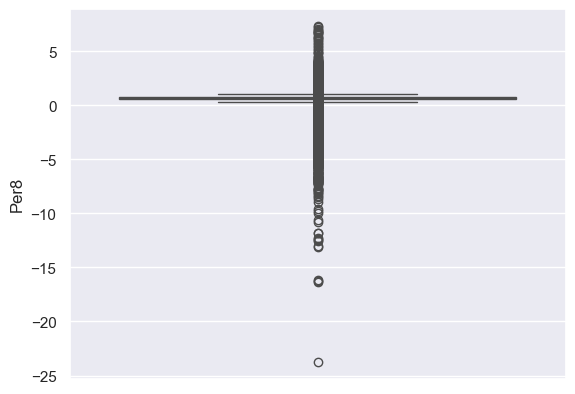

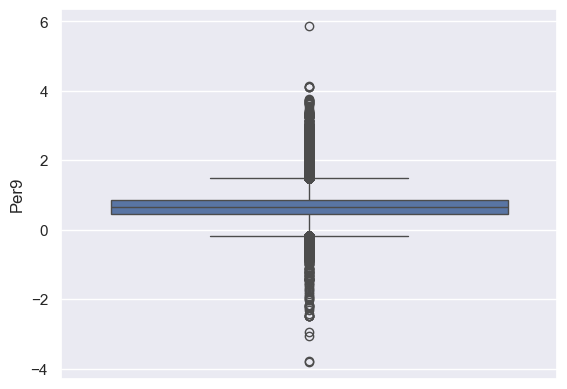

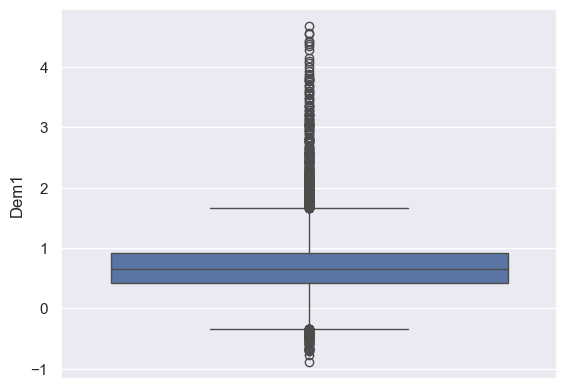

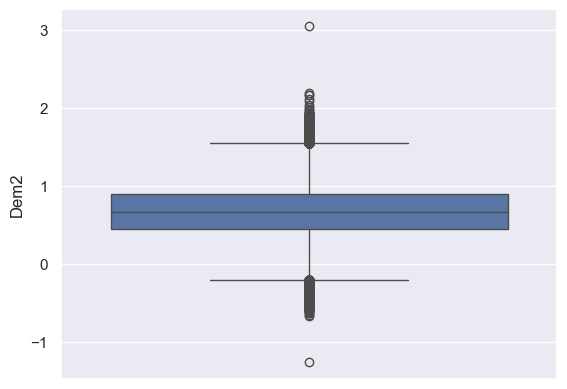

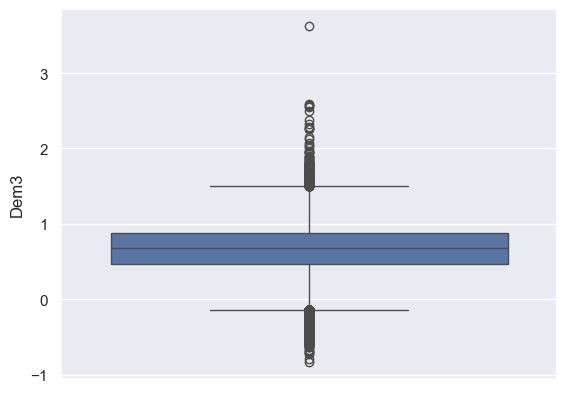

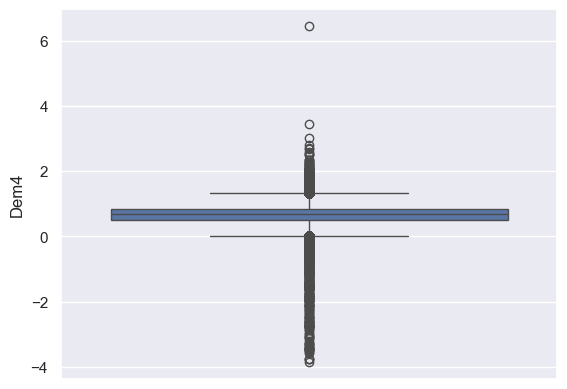

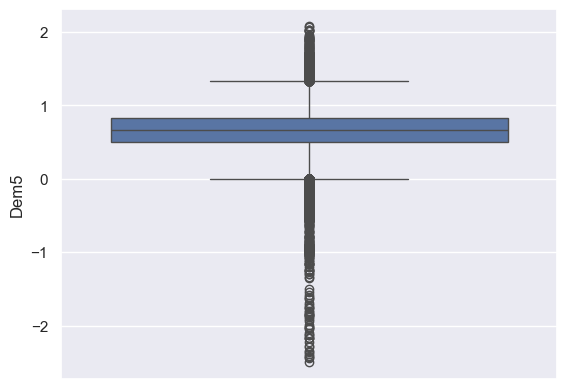

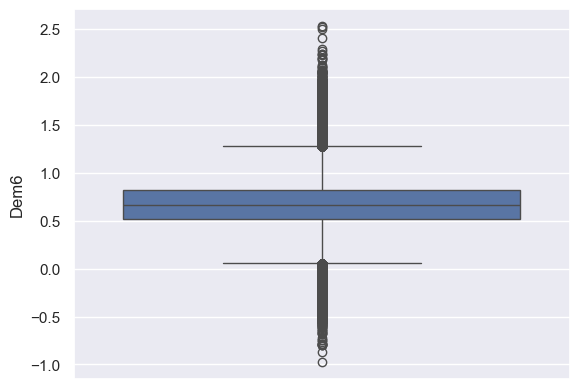

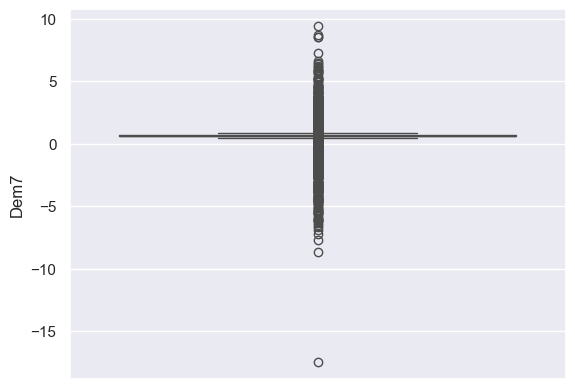

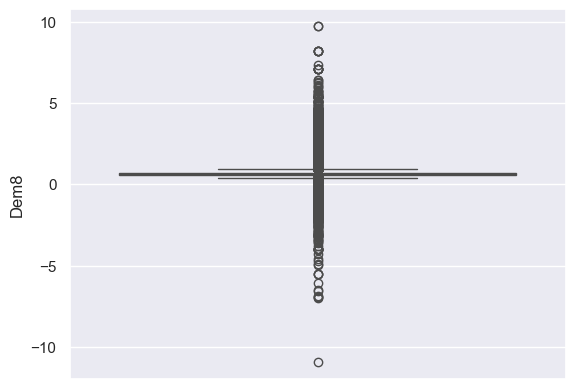

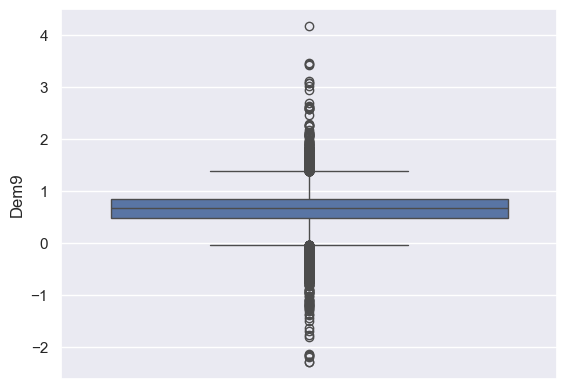

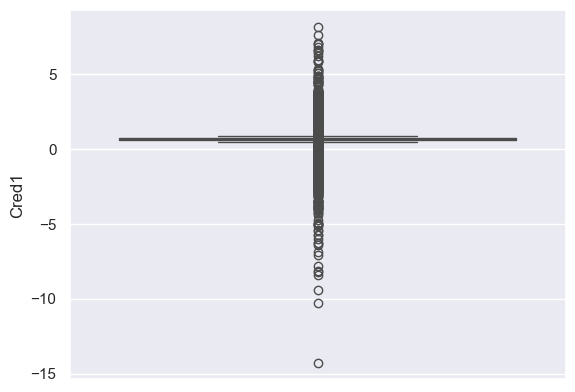

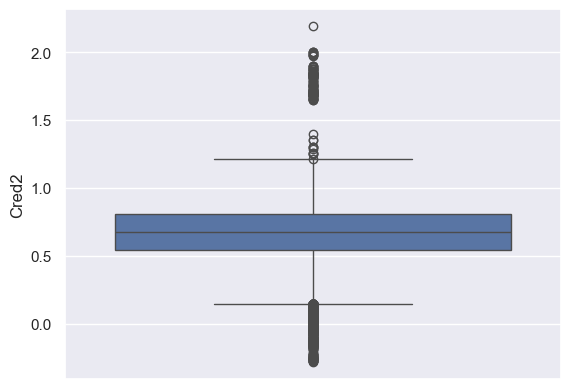

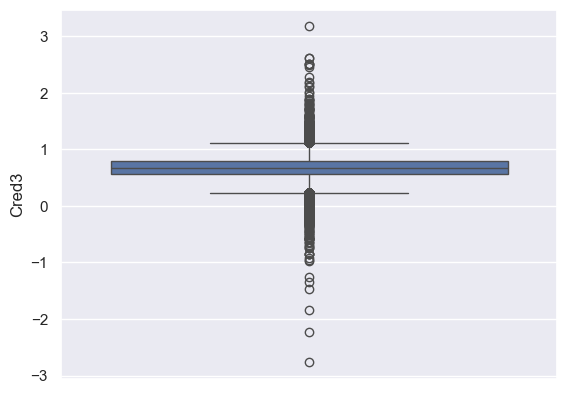

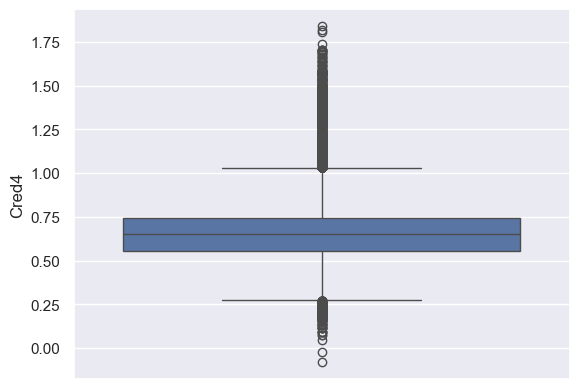

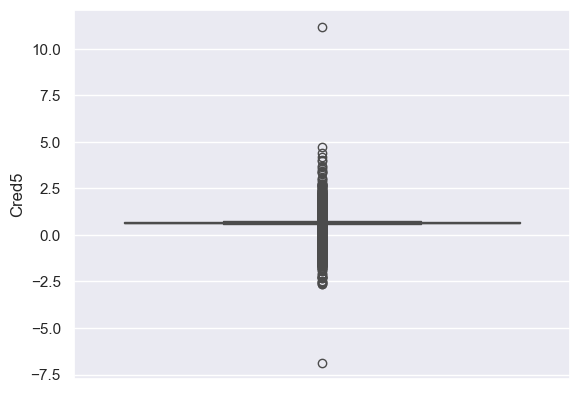

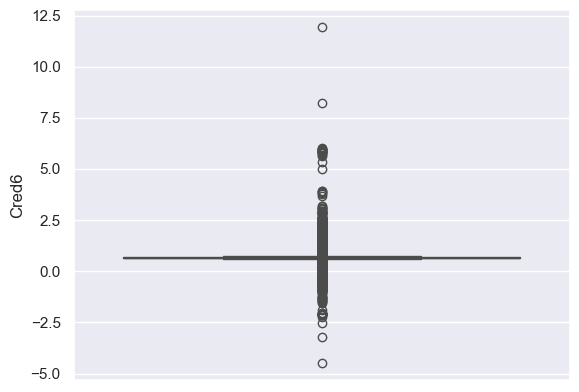

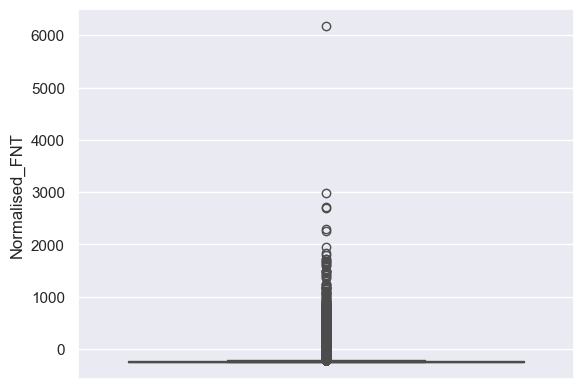

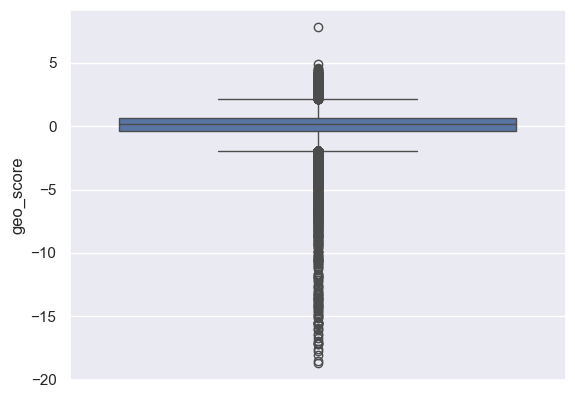

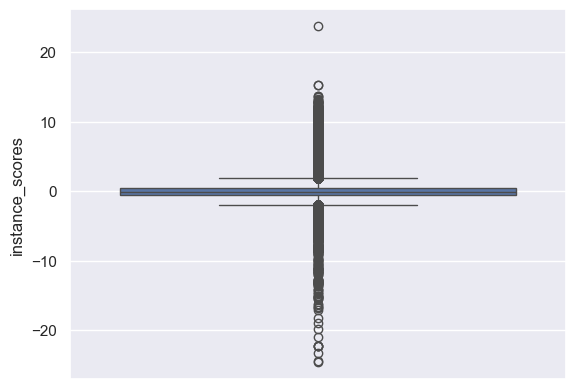

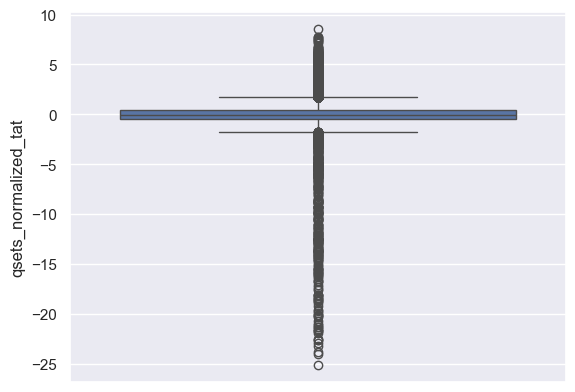

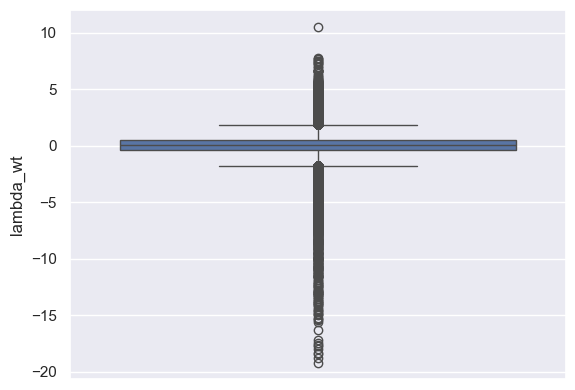

In [538]:
# Getting box_plots and saving the corresponding boxplots as images with corresponding column name

for i in list(X.select_dtypes(exclude = ['object']).columns):
    save_fig(X, i) 

# Outcome:
# Outliers are there
# I am not treating the outlier since the range is very low

## In case of treating outliers 

In [539]:
# Outlier Treatment

def check_outlier(col):
    '''This function gives lower limit and upper limit of a Pandas Series'''
    Q1, Q3 = col.quantile([.25, .75])
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    return lower_range, upper_range


# Use this funtion to get the lower limit and upper limit of each column
# Saving this function as get_outliers.py

In [540]:
# Checking the limits of 'lambda_wt' column

check_outlier(X['lambda_wt'])

(-1.8099999999999998, 1.8699999999999999)

### Capping the outliers - One of the approches to treat the outliers

In [541]:
'''# Getting the percentiles and capping the values
# Capping means that if a value is greater than or lower than some value, it'll cap it to the given capping value

def treat_outlier(x):
    # taking 5, 25, 75, 95
    q5 = np.percentile(x, 5)
    q25 = np.percentile(x, 25)
    q75 = np.percentile(x, 75)
    q95 = np.percentile(x, 95)
    # calculating IQR
    IQR = q75 - q25
    # calculating minimum threshold 
    lower_bound = q25 - 1.5 * IQR
    upper_bound = q75 + 1.5 * IQR
    print(q5, q25, q75, q95)
    # apply capping method
    return x.apply(lambda y: q95 if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)

# Saving this function as treat_outlier.py'''


"# Getting the percentiles and capping the values\n# Capping means that if a value is greater than or lower than some value, it'll cap it to the given capping value\n\ndef treat_outlier(x):\n    # taking 5, 25, 75, 95\n    q5 = np.percentile(x, 5)\n    q25 = np.percentile(x, 25)\n    q75 = np.percentile(x, 75)\n    q95 = np.percentile(x, 95)\n    # calculating IQR\n    IQR = q75 - q25\n    # calculating minimum threshold \n    lower_bound = q25 - 1.5 * IQR\n    upper_bound = q75 + 1.5 * IQR\n    print(q5, q25, q75, q95)\n    # apply capping method\n    return x.apply(lambda y: q95 if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)\n\n# Saving this function as treat_outlier.py"

In [543]:
'''# Use this code to cap outliers
for i in X:
    X[i] = treat_outlier(X[i])

# I am not going to cap the  outliers and treat the values as it is because range of outliers is low
# Hence commenting out the function and this code'''

'# Use this code to cap outliers\nfor i in X:\n    X[i] = treat_outlier(X[i])\n\n# I am not going to cap the  outliers and treat the values as it is because range of outliers is low\n# Hence commenting out the function and this code'

In [ ]:
#Checking the data again

X.describe()

# Outcome:
# Feature scaling is required

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,0.666006,0.667701,0.666315,0.666687,0.666723,0.667378,0.666934,0.666279,0.666688,0.666576,...,0.666264,0.666755,0.666878,0.666566,0.666776,-227.954170,0.008908,-0.000123,0.001346,0.000350
std,0.654133,0.548305,0.506357,0.471956,0.461393,0.444573,0.415657,0.401546,0.366537,0.340436,...,0.202204,0.174204,0.160803,0.135762,0.111612,61.951661,0.997629,1.091488,0.850169,0.957957
min,-18.136667,-23.573333,-15.443333,-1.226667,-37.246667,-8.053333,-13.853333,-23.740000,-3.810000,-0.893333,...,-0.280000,-2.766667,-0.080000,-6.856667,-4.476667,-250.000000,-18.680000,-24.590000,-25.156000,-19.210000
25%,0.360000,0.470000,0.370000,0.383333,0.436667,0.410000,0.483333,0.596667,0.453333,0.413333,...,0.546667,0.560000,0.556667,0.643333,0.650000,-248.617500,-0.400000,-0.540000,-0.480000,-0.430000
50%,0.670000,0.690000,0.726667,0.660000,0.650000,0.576667,0.680000,0.673333,0.650000,0.656667,...,0.680000,0.673333,0.650000,0.666667,0.670000,-244.510000,0.150000,-0.090000,-0.066000,0.050000
75%,1.103333,0.933333,1.010000,0.913333,0.870000,0.800000,0.856667,0.776667,0.866667,0.913333,...,0.813333,0.783333,0.746667,0.696667,0.693333,-230.750000,0.630000,0.450000,0.400000,0.490000
max,1.483333,8.020000,3.793333,6.163333,12.266667,25.100000,40.863333,7.336667,5.863333,4.673333,...,2.193333,3.173333,1.840000,11.203333,11.950000,6172.790000,7.850000,23.750000,8.540000,10.530000


In [545]:
# Imbalance check

y.value_counts()

Target
0.0    227451
1.0       394
Name: count, dtype: int64

In [548]:
# Make sure to standardizde the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X=pd.DataFrame(X)

In [549]:
#Checking the data again

X.describe()

# Outcome:
# Feature scaling is done

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
count,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,...,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05
mean,-1.571742e-17,-1.097725e-17,-2.619570e-18,4.303579e-18,1.147621e-17,9.729831e-18,-1.496897e-18,-6.237071e-18,-2.993794e-18,1.945966e-17,...,-9.854572e-18,-5.987588e-18,-1.172569e-17,-4.989657e-19,2.494828e-19,3.742243e-19,-9.979314e-19,2.931423e-18,8.482417e-18,-7.671597e-18
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-2.874447e+01,-4.421098e+01,-3.181486e+01,-4.011726e+00,-8.217170e+01,-1.961595e+01,-3.493340e+01,-6.078089e+01,-1.221350e+01,-4.582104e+00,...,-4.679759e+00,-1.970929e+01,-4.644689e+00,-5.541489e+01,-4.608324e+01,-3.558561e-01,-1.873336e+01,-2.252882e+01,-2.959106e+01,-2.005350e+01
25%,-4.678047e-01,-3.605683e-01,-5.851915e-01,-6.003821e-01,-4.986139e-01,-5.789326e-01,-4.417124e-01,-1.733613e-01,-5.820826e-01,-7.438795e-01,...,-5.914703e-01,-6.128164e-01,-6.853842e-01,-1.711252e-01,-1.503079e-01,-3.335403e-01,-4.098801e-01,-4.946259e-01,-5.661782e-01,-4.492380e-01
50%,6.105872e-03,4.066939e-02,1.191877e-01,-1.416771e-02,-3.624526e-02,-2.040406e-01,3.143566e-02,1.756780e-02,-4.552782e-02,-2.910820e-02,...,6.793120e-02,3.776502e-02,-1.049626e-01,7.443046e-04,2.888425e-02,-2.672385e-01,1.414280e-01,-8.234372e-02,-7.921500e-02,5.182947e-02
75%,6.685615e-01,4.844626e-01,6.787413e-01,5.226069e-01,4.405724e-01,2.983147e-01,4.564670e-01,2.749070e-01,5.455918e-01,7.248287e-01,...,7.273327e-01,6.692117e-01,4.961884e-01,2.217194e-01,2.379418e-01,-4.512932e-02,6.225696e-01,4.123949e-01,4.689126e-01,5.111413e-01
max,1.249484e+00,1.340918e+01,6.175532e+00,1.164655e+01,2.514117e+01,5.495757e+01,9.670601e+01,1.661179e+01,1.417772e+01,1.176951e+01,...,7.552138e+00,1.438883e+01,7.295413e+00,7.761210e+01,1.010933e+02,1.033186e+02,7.859741e+00,2.175945e+01,1.004350e+01,1.099180e+01


In [550]:
# Splitting the dataset into train and test
# Doing stratified sampling to handle imbalance dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=101, stratify=y)

In [ ]:
# Chekcing the stratified sampling 

print(y_train.value_counts()/(181961+315), y_test.value_counts()/(45490+79))

# Sampling looks good

Target
0.0    0.998272
1.0    0.001728
Name: count, dtype: float64 Target
0.0    0.998266
1.0    0.001734
Name: count, dtype: float64


# Model Building 

In [554]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression

### Logistic Regression

In [ ]:
# Logistic Regression

logit = LogisticRegression()
lr = logit.fit(X_train, y_train)
y_pred_train = logit.predict(X_train)
y_pred_test = logit.predict(X_test)

# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train))
print(confusion_matrix(y_test, y_pred_test))

# Classification Report
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

# Accuracy_score
print("Train Accuracy", accuracy_score(y_train, y_pred_train))
print("Test Accuracy", accuracy_score(y_test, y_pred_test))

# Outcome:
# Looks good


[[181935     26]
 [   119    196]]
[[45483     7]
 [   32    47]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       0.88      0.62      0.73       315

    accuracy                           1.00    182276
   macro avg       0.94      0.81      0.86    182276
weighted avg       1.00      1.00      1.00    182276

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.87      0.59      0.71        79

    accuracy                           1.00     45569
   macro avg       0.93      0.80      0.85     45569
weighted avg       1.00      1.00      1.00     45569

Train Accuracy 0.9992045030612917
Test Accuracy 0.9991441550176655


### Decision Trees Classifier

In [559]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dt = dtree.fit(X_train, y_train)
y_pred_train_dt = dtree.predict(X_train)
y_pred_test_dt = dtree.predict(X_test)

# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train_dt))
print(confusion_matrix(y_test, y_pred_test_dt))

# Classification Report
print(classification_report(y_train, y_pred_train_dt))
print(classification_report(y_test, y_pred_test_dt))

# Accuracy_score
print("Train Accuracy", accuracy_score(y_train, y_pred_train_dt))
print("Test Accuracy", accuracy_score(y_test, y_pred_test_dt))

# Outcome:
# Overfitting occurs

[[181961      0]
 [     0    315]]
[[45470    20]
 [   26    53]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       1.00      1.00      1.00       315

    accuracy                           1.00    182276
   macro avg       1.00      1.00      1.00    182276
weighted avg       1.00      1.00      1.00    182276

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.73      0.67      0.70        79

    accuracy                           1.00     45569
   macro avg       0.86      0.84      0.85     45569
weighted avg       1.00      1.00      1.00     45569

Train Accuracy 1.0
Test Accuracy 0.998990541815708


### Random Forest Classifier 

In [560]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier()
rf = rforest.fit(X_train, y_train)
y_pred_train_rf = rforest.predict(X_train)
y_pred_test_rf = rforest.predict(X_test)

# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train_rf))
print(confusion_matrix(y_test, y_pred_test_rf))

# Classification Report
print(classification_report(y_train, y_pred_train_rf))
print(classification_report(y_test, y_pred_test_rf))

# Accuracy_score
print("Train Accuracy", accuracy_score(y_train, y_pred_train_rf))
print("Test Accuracy", accuracy_score(y_test, y_pred_test_rf))

# Outcome:
# Overfitted model

[[181961      0]
 [     0    315]]
[[45487     3]
 [   22    57]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       1.00      1.00      1.00       315

    accuracy                           1.00    182276
   macro avg       1.00      1.00      1.00    182276
weighted avg       1.00      1.00      1.00    182276

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.95      0.72      0.82        79

    accuracy                           1.00     45569
   macro avg       0.97      0.86      0.91     45569
weighted avg       1.00      1.00      1.00     45569

Train Accuracy 1.0
Test Accuracy 0.9994513814215804


### XGBoost Classifier

In [561]:
from xgboost import XGBClassifier 
xgboost = XGBClassifier()
xgb = xgboost.fit(X_train, y_train)
y_pred_train_xgb = xgboost.predict(X_train)
y_pred_test_xgb = xgboost.predict(X_test)

# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train_xgb))
print(confusion_matrix(y_test, y_pred_test_xgb))

# Classification Report
print(classification_report(y_train, y_pred_train_xgb))
print(classification_report(y_test, y_pred_test_xgb))

# Accuracy_score
print("Train Accuracy", accuracy_score(y_train, y_pred_train_xgb))
print("Test Accuracy", accuracy_score(y_test, y_pred_test_xgb))

# Outcome:
# Overfitted model

[[181961      0]
 [     5    310]]
[[45485     5]
 [   22    57]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       1.00      0.98      0.99       315

    accuracy                           1.00    182276
   macro avg       1.00      0.99      1.00    182276
weighted avg       1.00      1.00      1.00    182276

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.92      0.72      0.81        79

    accuracy                           1.00     45569
   macro avg       0.96      0.86      0.90     45569
weighted avg       1.00      1.00      1.00     45569

Train Accuracy 0.999972569071079
Test Accuracy 0.9994074919353069


### Support Vector Machine

In [ ]:
from sklearn.svm import SVC
SVClass = SVC()
svm = SVClass.fit(X_train, y_train)
y_pred_train_svm = SVClass.predict(X_train)
y_pred_test_svm = SVClass.predict(X_test)

# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train_svm))
print(confusion_matrix(y_test, y_pred_test_svm))

# Classification Report
print(classification_report(y_train, y_pred_train_svm))
print(classification_report(y_test, y_pred_test_svm))

# Accuracy_score
print("Train Accuracy", accuracy_score(y_train, y_pred_train_svm))
print("Test Accuracy", accuracy_score(y_test, y_pred_test_svm))

# Outcome:
# Good model

[[181958      3]
 [    57    258]]
[[45488     2]
 [   34    45]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       0.99      0.82      0.90       315

    accuracy                           1.00    182276
   macro avg       0.99      0.91      0.95    182276
weighted avg       1.00      1.00      1.00    182276

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.96      0.57      0.71        79

    accuracy                           1.00     45569
   macro avg       0.98      0.78      0.86     45569
weighted avg       1.00      1.00      1.00     45569

Train Accuracy 0.9996708288529482
Test Accuracy 0.9992099892470758


### K Nearest Neighbors

In [563]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
k = knn.fit(X_train, y_train)
y_pred_train_knn = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)

# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train_knn))
print(confusion_matrix(y_test, y_pred_test_knn))

# Classification Report
print(classification_report(y_train, y_pred_train_knn))
print(classification_report(y_test, y_pred_test_knn))

# Accuracy_score
print("Train Accuracy", accuracy_score(y_train, y_pred_train_knn))
print("Test Accuracy", accuracy_score(y_test, y_pred_test_knn))

# Outcome:
# Slightly better than logistic regression but slower to train as it is a lazy learner and loads dataset in the RAM

[[181948     13]
 [    68    247]]
[[45483     7]
 [   28    51]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       0.95      0.78      0.86       315

    accuracy                           1.00    182276
   macro avg       0.97      0.89      0.93    182276
weighted avg       1.00      1.00      1.00    182276

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.88      0.65      0.74        79

    accuracy                           1.00     45569
   macro avg       0.94      0.82      0.87     45569
weighted avg       1.00      1.00      1.00     45569

Train Accuracy 0.9995556189514802
Test Accuracy 0.9992319339902126


### Naive Bayes Theorem

In [ ]:
from sklearn.naive_bayes import BernoulliNB

bernb = BernoulliNB()
bnb = bernb.fit(X_train, y_train)
y_pred_train_bnb = bernb.predict(X_train)
y_pred_test_bnb = bernb.predict(X_test)

# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train_bnb))
print(confusion_matrix(y_test, y_pred_test_bnb))

# Classification Report
print(classification_report(y_train, y_pred_train_bnb))
print(classification_report(y_test, y_pred_test_bnb))
y_pred_train_bnb
# Accuracy_score
print("Train Accuracy", accuracy_score(y_train, y_pred_train_bnb))
print("Test Accuracy", accuracy_score(y_test, y_pred_test_bnb))

# Outcome : 
# Good model

[[181919     42]
 [   110    205]]
[[45478    12]
 [   34    45]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       0.83      0.65      0.73       315

    accuracy                           1.00    182276
   macro avg       0.91      0.83      0.86    182276
weighted avg       1.00      1.00      1.00    182276

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.79      0.57      0.66        79

    accuracy                           1.00     45569
   macro avg       0.89      0.78      0.83     45569
weighted avg       1.00      1.00      1.00     45569

Train Accuracy 0.9991660997608023
Test Accuracy 0.998990541815708


### Voting Classifier

In [565]:
from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('logit', lr), ('dtree', dt), ('rforest', rf), ('xgboost', xgb), ('svm', svm), ('bnb', bnb)])

voting_evc = voting.fit(X_train, y_train)
y_pred_train_voting = voting.predict(X_train)
y_pred_test_voting = voting.predict(X_test)

# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train_voting))
print(confusion_matrix(y_test, y_pred_test_voting))

# Classification Report
print(classification_report(y_train, y_pred_train_voting))
print(classification_report(y_test, y_pred_test_voting))
y_pred_train_bnb
# Accuracy_score
print("Train Accuracy", accuracy_score(y_train, y_pred_train_voting))
print("Test Accuracy", accuracy_score(y_test, y_pred_test_voting))

# Outcome:
# Best among all models

[[181961      0]
 [    55    260]]
[[45489     1]
 [   25    54]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       1.00      0.83      0.90       315

    accuracy                           1.00    182276
   macro avg       1.00      0.91      0.95    182276
weighted avg       1.00      1.00      1.00    182276

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.98      0.68      0.81        79

    accuracy                           1.00     45569
   macro avg       0.99      0.84      0.90     45569
weighted avg       1.00      1.00      1.00     45569

Train Accuracy 0.9996982597818692
Test Accuracy 0.9994294366784436


In [567]:
accuracy_voting = accuracy_score(y_test, y_pred_test_voting)
accuracy_logit = accuracy_score(y_test, y_pred_test)
accuracy_dtree = accuracy_score(y_test, y_pred_test_dt)
accuracy_rf = accuracy_score(y_test, y_pred_test_rf)
accuracy_xgb = accuracy_score(y_test, y_pred_test_xgb)
accuracy_svm = accuracy_score(y_test, y_pred_test_svm)
accuracy_bnb = accuracy_score(y_test, y_pred_test_bnb)

  Method Used  Accuracy
0    Logistic  0.999144
1       Dtree  0.998991
2     Rforest  0.999451
3     XGBoost  0.999407
4         SVM  0.999210
5         BNB  0.998991
6      Voting  0.999429


[Text(0, 0, 'Logistic'),
 Text(1, 0, 'Dtree'),
 Text(2, 0, 'Rforest'),
 Text(3, 0, 'XGBoost'),
 Text(4, 0, 'SVM'),
 Text(5, 0, 'BNB'),
 Text(6, 0, 'Voting')]

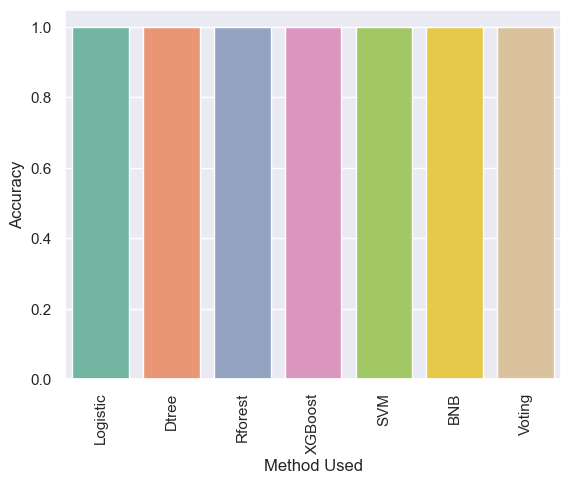

In [568]:
point1 = ["Logistic", "Dtree", "Rforest", "XGBoost", "SVM", "BNB", "Voting"]
point2 =[accuracy_logit, accuracy_dtree, accuracy_rf, accuracy_xgb, accuracy_svm, accuracy_bnb, accuracy_voting]

final_output = pd.DataFrame({"Method Used": point1, "Accuracy":point2})
print(final_output)

chart = sns.barplot(x="Method Used" , y="Accuracy", data = final_output, color='skyblue', palette='Set2')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)

### Stacking method

In [569]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB


In [570]:
estimators = [('dt', DecisionTreeClassifier()), 
              ('rf', RandomForestClassifier()),
              ('gdbt', GradientBoostingClassifier()),
              ('svm', SVC()),
              ('nbt', BernoulliNB())]


In [571]:
estimators = [('rf', RandomForestClassifier()),
              ('gdbt', GradientBoostingClassifier()),
              ('nbt', BernoulliNB())]


In [572]:
from sklearn.ensemble import StackingClassifier

In [573]:
classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(),
                                cv=3)

In [574]:
classifier.fit(X_train, y_train)

,estimators,"[('rf', ...), ('gdbt', ...), ...]"
,final_estimator,LogisticRegression()
,cv,3
,stack_method,'auto'
,n_jobs,None
,passthrough,False
,verbose,0
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2


In [575]:
y_pred_train_stack = classifier.predict(X_train)
y_pred_test_stack = classifier.predict(X_test)

In [ ]:
# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train_stack))
print(confusion_matrix(y_test, y_pred_test_stack))

# Classification Report
print(classification_report(y_train, y_pred_train_stack))
print(classification_report(y_test, y_pred_test_stack))
y_pred_train_bnb
# Accuracy_score
print("Train Accuracy", accuracy_score(y_train, y_pred_train_stack))
print("Test Accuracy", accuracy_score(y_test, y_pred_test_stack))

# Outcome:
# Also one of the bests

[[181955      6]
 [    73    242]]
[[45488     2]
 [   32    47]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       0.98      0.77      0.86       315

    accuracy                           1.00    182276
   macro avg       0.99      0.88      0.93    182276
weighted avg       1.00      1.00      1.00    182276

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.96      0.59      0.73        79

    accuracy                           1.00     45569
   macro avg       0.98      0.80      0.87     45569
weighted avg       1.00      1.00      1.00     45569

Train Accuracy 0.9995665913230486
Test Accuracy 0.9992538787333495


# Anomaly Detection - Isolation Forest Classifier

In [577]:
from sklearn.ensemble import IsolationForest

In [578]:
outlier_fraction = 394 / (394 + 227451)
outlier_fraction

0.001729245759178389

In [579]:
isolation = IsolationForest(contamination=outlier_fraction)
isolation.fit(X_train, y_train)

,n_estimators,100
,max_samples,'auto'
,contamination,0.001729245759178389
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,None
,verbose,0
,warm_start,False


In [580]:
anomaly_pred_train = isolation.predict(X_train)
anomaly_pred_test = isolation.predict(X_test)

In [581]:
pd.DataFrame(anomaly_pred_test).head()

,0
0,1
1,1
2,1
3,1
4,1


In [582]:
# Confusion Matrix
print(confusion_matrix(y_train, anomaly_pred_train))
print(confusion_matrix(y_test, anomaly_pred_test))

# Classification Report
print(classification_report(y_train, anomaly_pred_train))
print(classification_report(y_test, anomaly_pred_test))
y_pred_train_bnb
# Accuracy_score
print("Train Accuracy", accuracy_score(y_train, anomaly_pred_train))
print("Test Accuracy", accuracy_score(y_test, anomaly_pred_test))

[[     0      0      0]
 [   232      0 181729]
 [    84      0    231]]
[[    0     0     0]
 [   57     0 45433]
 [   20     0    59]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00    181961
         1.0       0.00      0.73      0.00       315

    accuracy                           0.00    182276
   macro avg       0.00      0.24      0.00    182276
weighted avg       0.00      0.00      0.00    182276

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00     45490
         1.0       0.00      0.75      0.00        79

    accuracy                           0.00     45569
   macro avg       0.00      0.25      0.00     45569
weighted avg       0.00      0.00      0.00     45569

Train Accuracy 0.0012673089161491366
Test Accuracy 0.0012947398450701135


In [583]:
for i in range(len(X_test)):
    if anomaly_pred_test[i] == -1:
        print(f"Anomaly Detected:\n{i}\n")
    else:
        print(f"Normal Transaction:\n{i}\n")

Normal Transaction:
0

Normal Transaction:
1

Normal Transaction:
2

Normal Transaction:
3

Normal Transaction:
4

Normal Transaction:
5

Normal Transaction:
6

Normal Transaction:
7

Normal Transaction:
8

Normal Transaction:
9

Normal Transaction:
10

Normal Transaction:
11

Normal Transaction:
12

Normal Transaction:
13

Normal Transaction:
14

Normal Transaction:
15

Normal Transaction:
16

Normal Transaction:
17

Normal Transaction:
18

Normal Transaction:
19

Normal Transaction:
20

Normal Transaction:
21

Normal Transaction:
22

Normal Transaction:
23

Normal Transaction:
24

Normal Transaction:
25

Normal Transaction:
26

Normal Transaction:
27

Normal Transaction:
28

Normal Transaction:
29

Normal Transaction:
30

Normal Transaction:
31

Normal Transaction:
32

Normal Transaction:
33

Normal Transaction:
34

Normal Transaction:
35

Normal Transaction:
36

Normal Transaction:
37

Normal Transaction:
38

Normal Transaction:
39

Normal Transaction:
40

Normal Transaction:
41

No

In [584]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [585]:
final_classification_model ={"IsolationForest" : IsolationForest(contamination=outlier_fraction, max_samples=len(X_train)), 
                             "LocalOutlierFactor" : LocalOutlierFactor(contamination=outlier_fraction),
                             "OneClassSVM" : OneClassSVM()}

In [586]:
fraud = train_data[train_data["Target"]==1]
normal =train_data[train_data["Target"]==0]

In [587]:
len(fraud)

394

In [588]:
test_data.columns

Index(['Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7', 'Per8', 'Per9',
       'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7', 'Dem8', 'Dem9',
       'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6', 'Normalised_FNT',
       'geo_score', 'instance_scores', 'qsets_normalized_tat', 'lambda_wt'],
      dtype='object')

In [ ]:
total_outlier_found = len(fraud)

for i, (clf_name, clf) in enumerate(final_classification_model.items()):
    if clf_name == "LocalOutlierFactor":
        y_pred = clf.fit_predict(X_test)
        score_prediction = clf.negative_outlier_factor_
    elif clf_name == "OneClassSVM":
        clf.fit(X_train)
        y_pred = clf.predict(X_test)
    else:
        clf.fit(X_train)
        y_pred = clf.predict(X_test)
        score_prediction = clf.decision_function(X_train)

    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_error = (y_pred != y_test).sum()

    print("{} : {}".format(clf_name, n_error))
    print("Accuracy Score : ")
    print(accuracy_score(y_test, y_pred))


# Outcome:
# Isolation Forest and Local Outlier Factor outperforms One Class SVM
        

IsolationForest : 120
Accuracy Score : 
0.9973666308235862
LocalOutlierFactor : 154
Accuracy Score : 
0.9966205095569356
OneClassSVM : 22684
Accuracy Score : 
0.5022054466852466
